In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from edfreader import read_edf
import numpy as np
%matplotlib notebook

In [2]:
timeStr = '2017-07-21_142241'
observer = 'laurent'

mode = 'enregistrement'

In [3]:
file = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.pkl')
with open(file, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')
    
resultats = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.asc')
data = read_edf(resultats, 'TRIALID')

In [4]:
N_trials = exp['N_trials']
N_blocks = exp['N_blocks']
screen_width_px = exp['screen_width_px']
screen_height_px = exp['screen_height_px']
V_X = exp['V_X']
RashBass = exp['RashBass']
stim_tau = exp['stim_tau']
p = exp['p']

<IPython.core.display.Javascript object>


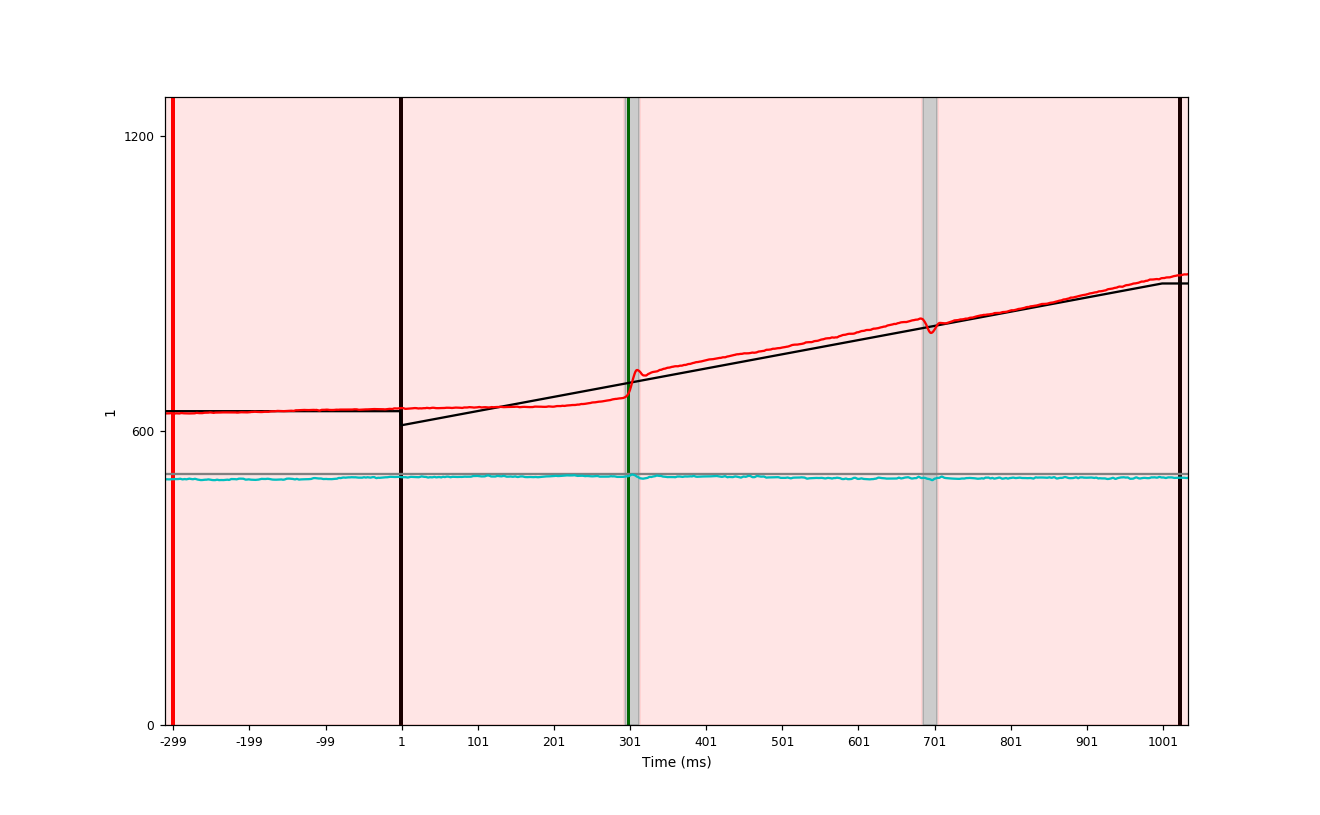

In [5]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/1.6180)))

block = 0
trial = 0

trial_data = trial + N_trials*block

data_x = data[trial_data]['x']
data_y = data[trial_data]['y']
trackertime = data[trial_data]['trackertime']

TRIALID = data[trial_data]['events']['msg'][0][0]
StimulusOn = data[trial_data]['events']['msg'][10][0]
StimulusOf = data[trial_data]['events']['msg'][14][0]
TargetOn = data[trial_data]['events']['msg'][15][0]
TargetOff = data[trial_data]['events']['msg'][16][0]
fixations = data[trial_data]['events']['Efix']
saccades = data[trial_data]['events']['Esac']

liste_1 = []
for x in range(len(trackertime-trackertime[0])):
    if x >= StimulusOf - trackertime[0] :
        if data_x[x] >= (data_x[StimulusOf-trackertime[0]]+40):
            liste_1.append(x+trackertime[0])

start = TargetOn

TRIALID = TRIALID - start
StimulusOn = StimulusOn - start
StimulusOf = StimulusOf - start
TargetOn = TargetOn - start
TargetOff = TargetOff - start

trackertime = trackertime - start
latence = liste_1[0] - start

##################################################
# TARGET
##################################################
dir_bool = p[trial, block, 0]*2 - 1
tps_mvt = TargetOff-TargetOn
Target_trial = []
x = screen_width_px/2

d = 100
for t in range(len(trackertime)):
    if t < (TargetOn-trackertime[0]) :
        x = screen_width_px/2
    elif t == (TargetOn-trackertime[0]) :
        # la cible à t=0 recule de sa vitesse * latence=RashBass (ici mis en ms)
        x = x -(dir_bool * ((V_X/1000)*RashBass))
    elif (t > (TargetOn-trackertime[0]) and t <= ((TargetOn-trackertime[0])+stim_tau*1000)) :
        x = x + (dir_bool*(V_X/1000))
    else :
        x = x
    Target_trial.append(x)
##################################################

axs.axis([StimulusOf-10, TargetOff+10, 0, 1280])

axs.plot(trackertime, np.ones(len(trackertime))*(screen_height_px/2), color='grey', linewidth=1.5)
axs.plot(trackertime, data_y, color='c', linewidth=1.5)

axs.plot(trackertime, Target_trial, color='k', linewidth=1.5)
axs.plot(trackertime, data_x, color='r', linewidth=1.5)


axs.bar(StimulusOf, 1280, color='r', width=5, linewidth=0)
axs.bar(TargetOn, 1280, color='k', width=5, linewidth=0)
axs.bar(TargetOff, 1280, color='k', width=5, linewidth=0)
axs.bar(latence, 1280, color='g', width=5, linewidth=0)


axs.set_xlabel('Time (ms)', fontsize=9)
axs.xaxis.set_ticks(range(StimulusOf+1, TargetOff, 100))
axs.xaxis.set_ticklabels(range(StimulusOf+1, TargetOff, 100), fontsize=8)
axs.set_ylabel(trial+1, fontsize=9)
axs.yaxis.set_ticks(range(0, 1280, 600))
axs.yaxis.set_ticklabels(range(0, 1280, 600), fontsize=8)


for f in range(len(fixations)) :
    axs. axvspan(fixations[f][0]-start, fixations[f][1]-start, color='r', alpha=0.1)
for s in range(len(saccades)) :
    axs. axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)


In [6]:
trackertime, data_x

(array([-1051, -1050, -1049, ...,  1121,  1122,  1123]),
 array([ 651.8,  651.9,  652.1, ...,  942.5,  942.9,  942.8]))

<IPython.core.display.Javascript object>


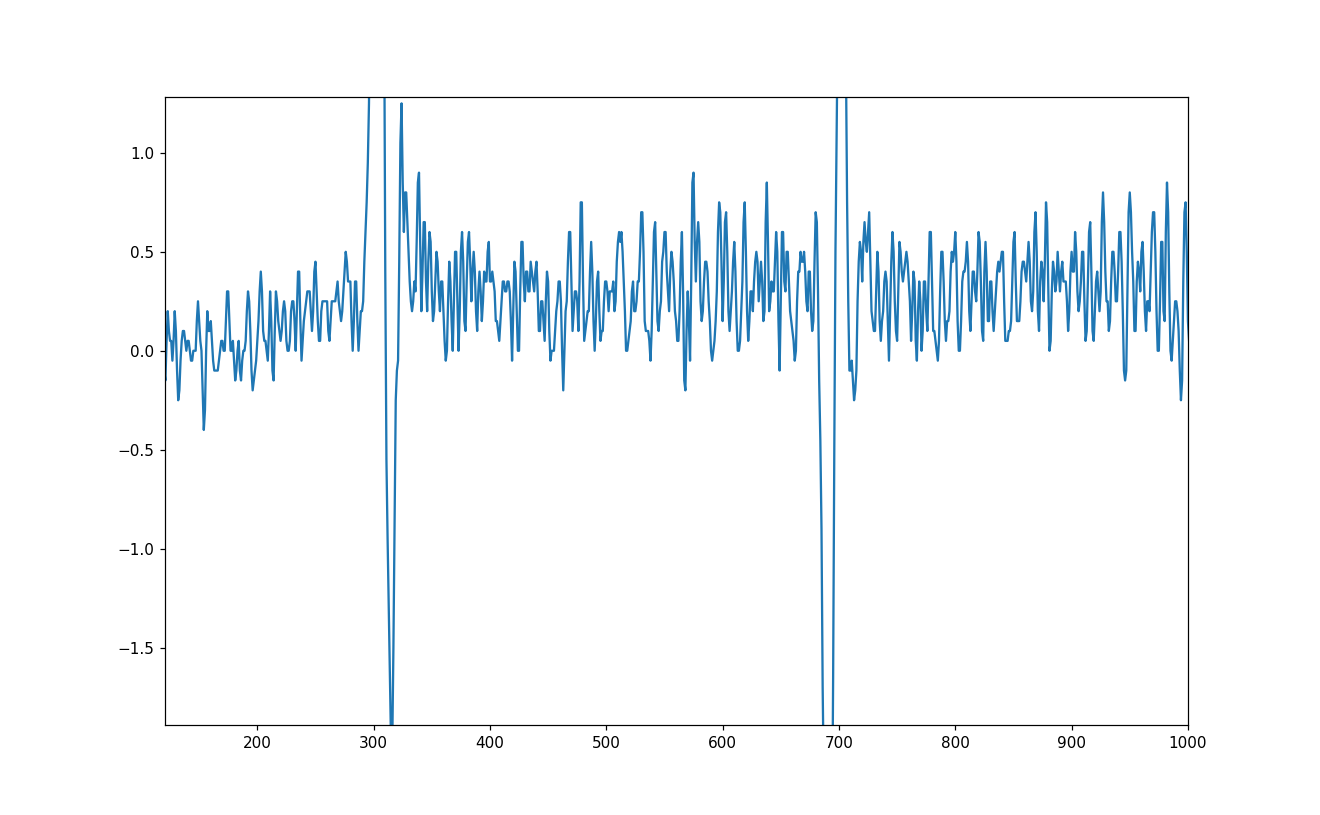

In [8]:
fig_width= 12
fig, ax = plt.subplots(1, 1, figsize=(fig_width, (fig_width/1.6180)))
ax.plot(trackertime,  np.gradient(data_x) )


https://lmfit.github.io/lmfit-py/index.html